# **London bikes sharing**

### **1) Content**

#### The data is acquired from 3 sources:
#### - https://cycling.data.tfl.gov.uk/ 'TfL Open Data' (represent the count of new bike shares grouped by hour)
#### - https://freemeteo.co.uk - London weather station
#### - https://www.gov.uk/bank-holidays from 1/1/2015 to 31/12/2016

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**1) Inspect data**

In [2]:
bikeshares = pd.read_csv('London_merged.csv', index_col = False)
bikeshares.head(10)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
5,2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,1.0,0.0,1.0,3.0
6,2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
7,2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
8,2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4.0,0.0,1.0,3.0
9,2015-01-04 09:00:00,301,2.0,-0.5,100.0,9.0,3.0,0.0,1.0,3.0


**2) Understanding the data**

- **timestamp** (timestamp field for grouping the data)
- **cnt** (the count of a new bike shares)
- **t1** (real temperature in Celsius)
- **t2** (temperature in Celsius "feels like")
- **hum** (humidity in percentage)
- **windspeed** (wind speed in km/h)
- **weathercode** (category of the weather)
     1 = Clear (mostly clear but have some values with haze/fog/patches of fog/fog in vicinity)
     2 = Scattered clouds/few clouds
     3 = Broken clouds
     4 = Cloudy
     7 = Rain/Light rain shower/Light rain
     10 = Rain with thunderstorm
     26 = Snowfall

- **isholiday** (boolean field: holiday/non holiday)
- **isweekend** (boolean field: 1 if the day is weekend)
- **season** (0-spring, 1-summer, 2-fall, 3-winter)

**3) Checking for any inproper or missing values in data set**

In [3]:
bikeshares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


`'Timestamp'` data are full time observation made hour after hour. 
After slicing it into few parts (like `year`, `month`, `day` and `hour`) there will be a higher chance of making good analytical model.

In [4]:
import datetime as dt

# convert timestamp string to datetime format for entire timestamp column
bikeshares['timestamp'] = pd.to_datetime(bikeshares['timestamp']) 

bikeshares['Hour'] = bikeshares['timestamp'].dt.hour # 24-hour version (0-23)
bikeshares['Weekday'] = bikeshares['timestamp'].dt.day
bikeshares['Month'] = bikeshares['timestamp'].dt.month
bikeshares['Year'] = bikeshares['timestamp'].dt.year # 4-digits year standard (2xxx)

### Change columns name into more understandable descriptions

In [5]:
bikeshares.rename(columns={'cnt': 'Bikes share',
                           't1': 'Temp 1',
                           't2': 'Temp 2',
                           'hum': 'Humidity',
                           'wind_speed': 'Wind speed',
                           'weather_code': 'Weather code',
                           'is_holiday': 'Holiday',
                           'is_weekend': 'Weekend',
                           'season': 'Season'},
                  inplace=True)

---

## `'Bikes share'` data analysis

**1) General statistic**

In [6]:
bikeshares['Bikes share'].describe().round(0)

count    17414.0
mean      1143.0
std       1085.0
min          0.0
25%        257.0
50%        844.0
75%       1672.0
max       7860.0
Name: Bikes share, dtype: float64

#### Standard deviation is almost equal the mean value, but maximum value is 9 times higher than median. This data is not Gaussian distribution.

**2) Graphical data representation**

### Plot bike shares over time

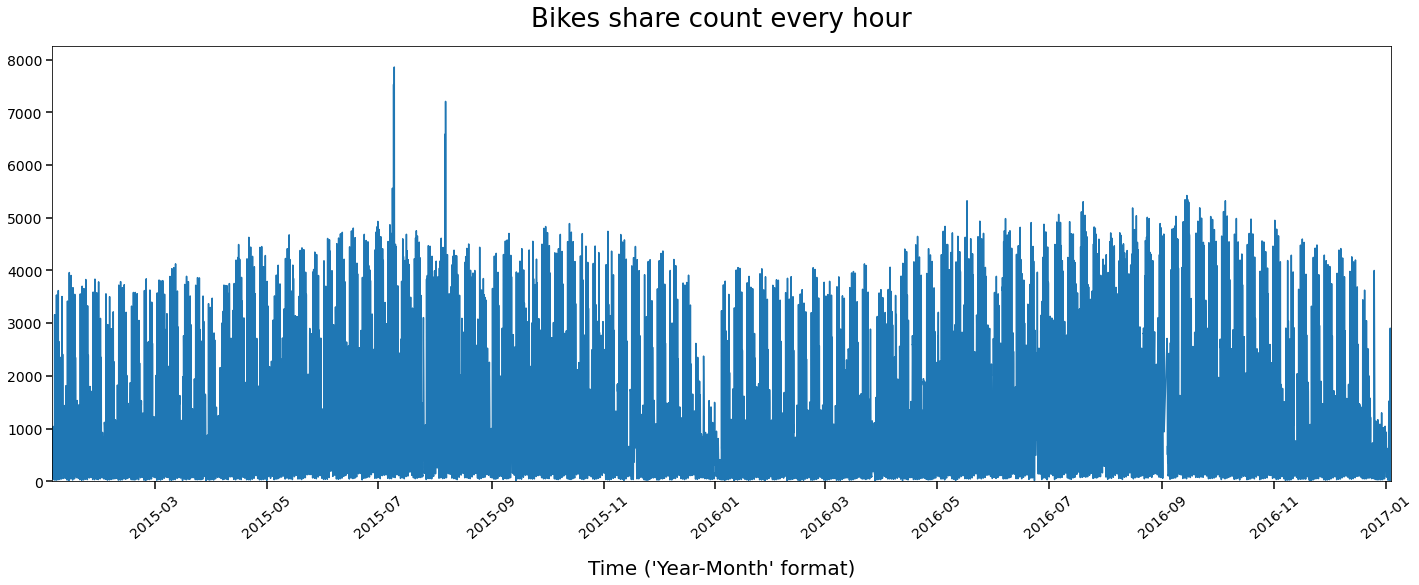

In [7]:
import matplotlib.dates as mdates

fig, axs = plt.subplots(figsize=(24,8))

x_val = bikeshares['timestamp']

plt.plot(x_val, bikeshares['Bikes share'])
plt.xlim((x_val.min(), x_val.max()))
plt.ylim(bottom=0)
plt.xlabel("Time ('Year-Month' format)", fontsize=20, labelpad=18)
plt.ylabel('')
# Rotates the x labels so they don't crowd each other.
plt.tick_params(axis='x', width=1.5, length=8, labelsize=14, labelrotation=40)
# Text in the x axis will be displayed in 'YYYY-mm' format.
axs.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,3,5,7,9,11)))
plt.tick_params(axis='y', width=1.5, length=6, labelsize=14)
plt.title('Bikes share count every hour', fontsize=26, pad=20)

plt.show()

### Plot bike shares over time using statistical type of charts

It is good to compare data before cleaning from outliers with data after cleaning. Results might be very suprisingly.

In [8]:
def Outliers_filter(col):
    ## Removing outliers from column with quantiles method
    col_data = bikeshares[col]
    Q1, Q3 = col_data.quantile(0.25), col_data.quantile(0.75)
    IQR = Q3-Q1
    ## New data range
    lower, upper = Q1-(1.5*IQR), Q3+(1.5*IQR)
    _ = bikeshares[(col_data >= lower) & (col_data <= upper)]
    return _.reset_index(drop=True)

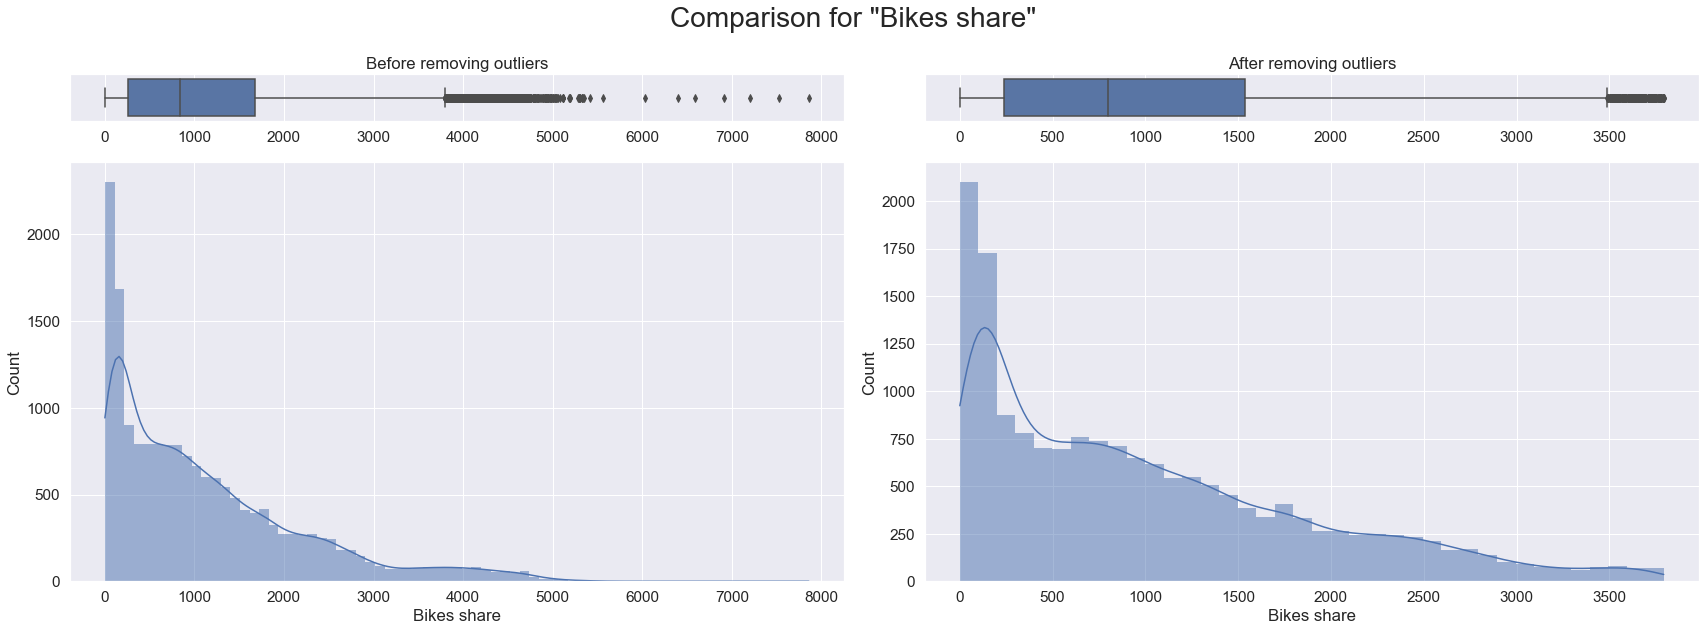

In [9]:
# Optimal number of bins
bins_number = int(np.sqrt(len(bikeshares)))


def Cleaning_data_effectiveness(cols):
    sns.set(style="darkgrid", font_scale=1.4)
    f, ax_ = plt.subplots(2, 2, figsize=(24, 9), gridspec_kw={"height_ratios": (.1, .9)})
    x1, x2 = bikeshares, Outliers_filter(cols)
    sns.boxplot(data=x1, x=cols, ax=ax_[0,0])
    sns.histplot(data=x1, x=cols, edgecolor="none", kde=True, ax=ax_[1,0])
    ax_[0,0].set(xlabel='', title='Before removing outliers')
    sns.boxplot(data=x2, x=x2[cols], ax=ax_[0,1])
    sns.histplot(data=x2, x=x2[cols], edgecolor="none", kde=True, ax=ax_[1,1])
    ax_[0,1].set(xlabel='', title='After removing outliers')
    plt.suptitle(f'Comparison for "{cols}"', fontsize=28)

    plt.tight_layout()
    plt.show()

Cleaning_data_effectiveness('Bikes share')

### Bikes share distribution still does not look like a 'normal' (Gaussian) after removing outliers, so we have to use another statistical method.

---

### Categorical columns inspecting

Statistic as a representation with pie chart for each class of columns `'Weather code'`, `'Holiday'`, `'Weekend'` and `'Season'`

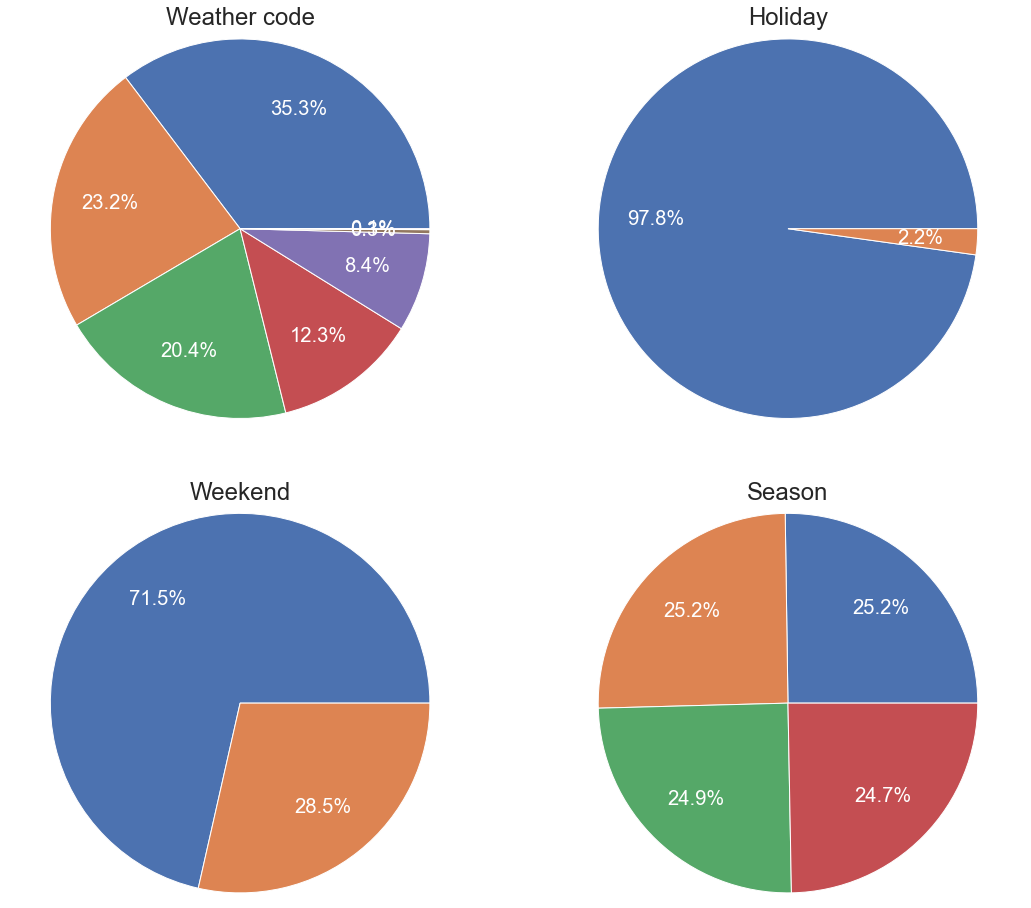

In [10]:
fig, axes = plt.subplots(2,2, figsize=(18,16))
cols_name = ['Weather code', 'Holiday', 'Weekend', 'Season']

for i, ax in enumerate(axes.flatten()):
    type_value_count = 100*(bikeshares[cols_name[i]].value_counts(normalize=True))
    label = np.unique(bikeshares[[cols_name[i]]])
    ax.pie(type_value_count, radius=1.2, labels=label, 
           textprops={'color':'white', 'size':'large'}, 
           autopct="%.1f%%", pctdistance=0.7)
    ax.set_title(cols_name[i], fontsize=24)

plt.show()

### Join weather code '10.0' with '7.0' (there are the same type - rain) and remove rows with code '26.0' (this is only 0.3% of all data).

In [11]:
bikeshares['Weather code'] = bikeshares['Weather code'].mask(lambda col: col == 10.0, 7.0)
bikeshares = bikeshares.query('`Weather code` != 26.0')

bikeshares['Weather code'].value_counts(normalize=True)

1.0    0.354385
2.0    0.232454
3.0    0.204621
7.0    0.124179
4.0    0.084361
Name: Weather code, dtype: float64

### Graphical compare data for `'Temp 2'`, `'Humidity'`, `'Wind speed'` columns before and after outliers removing

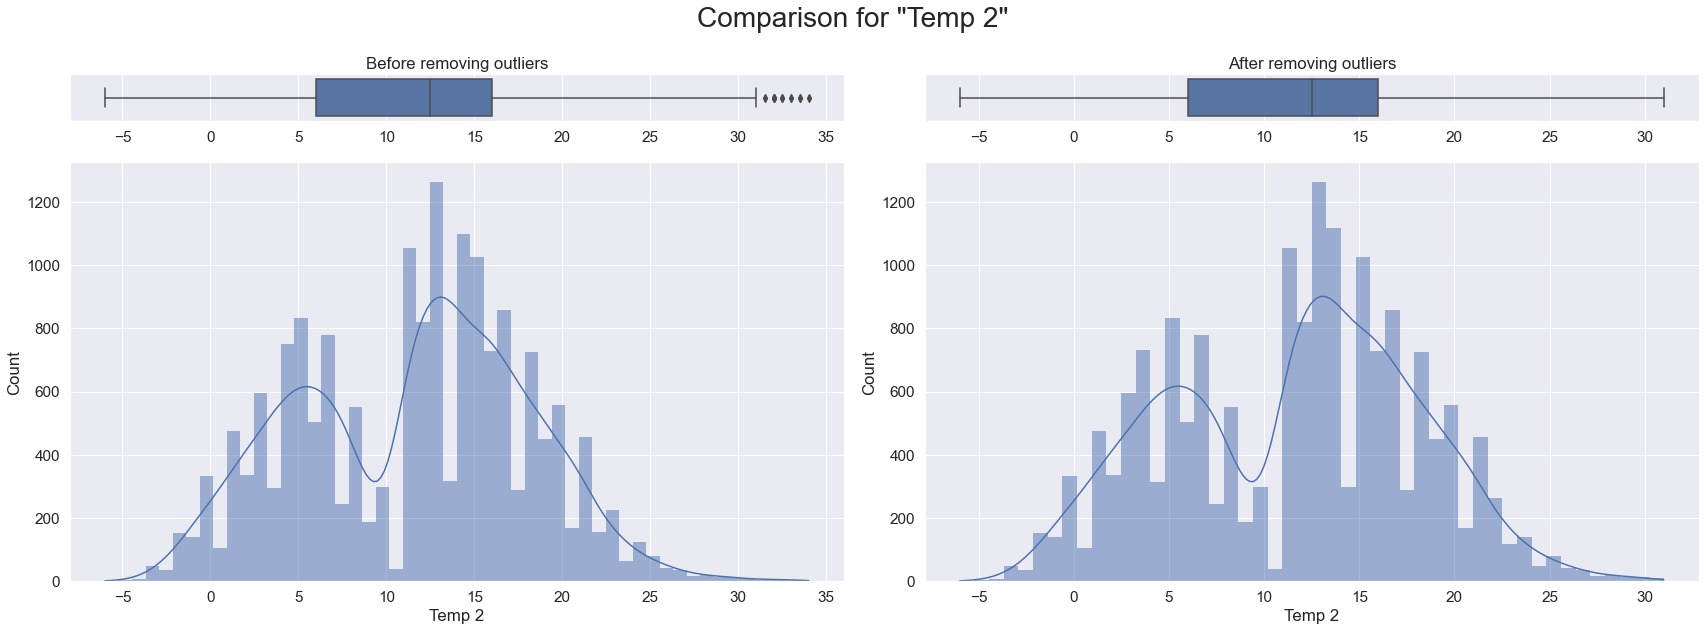

In [12]:
Cleaning_data_effectiveness('Temp 2')

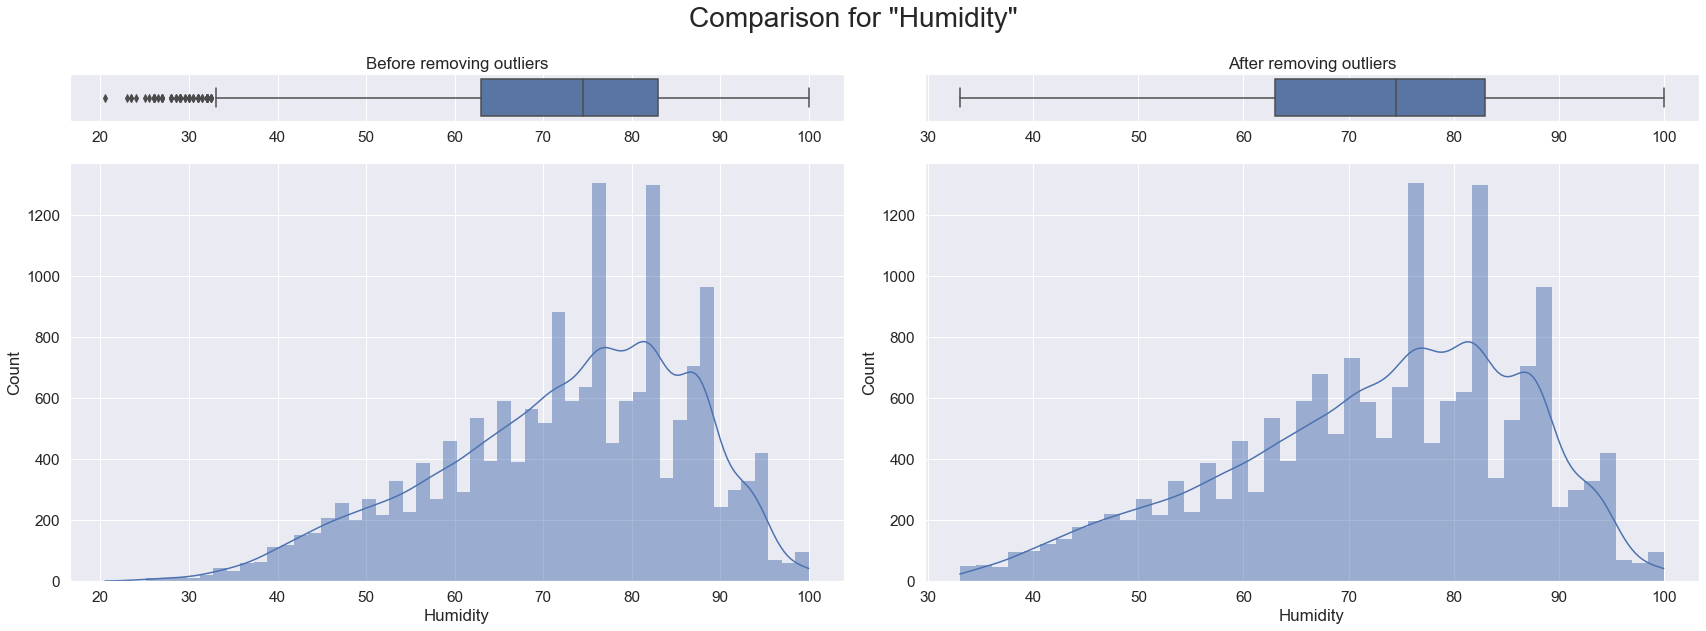

In [13]:
Cleaning_data_effectiveness('Humidity')

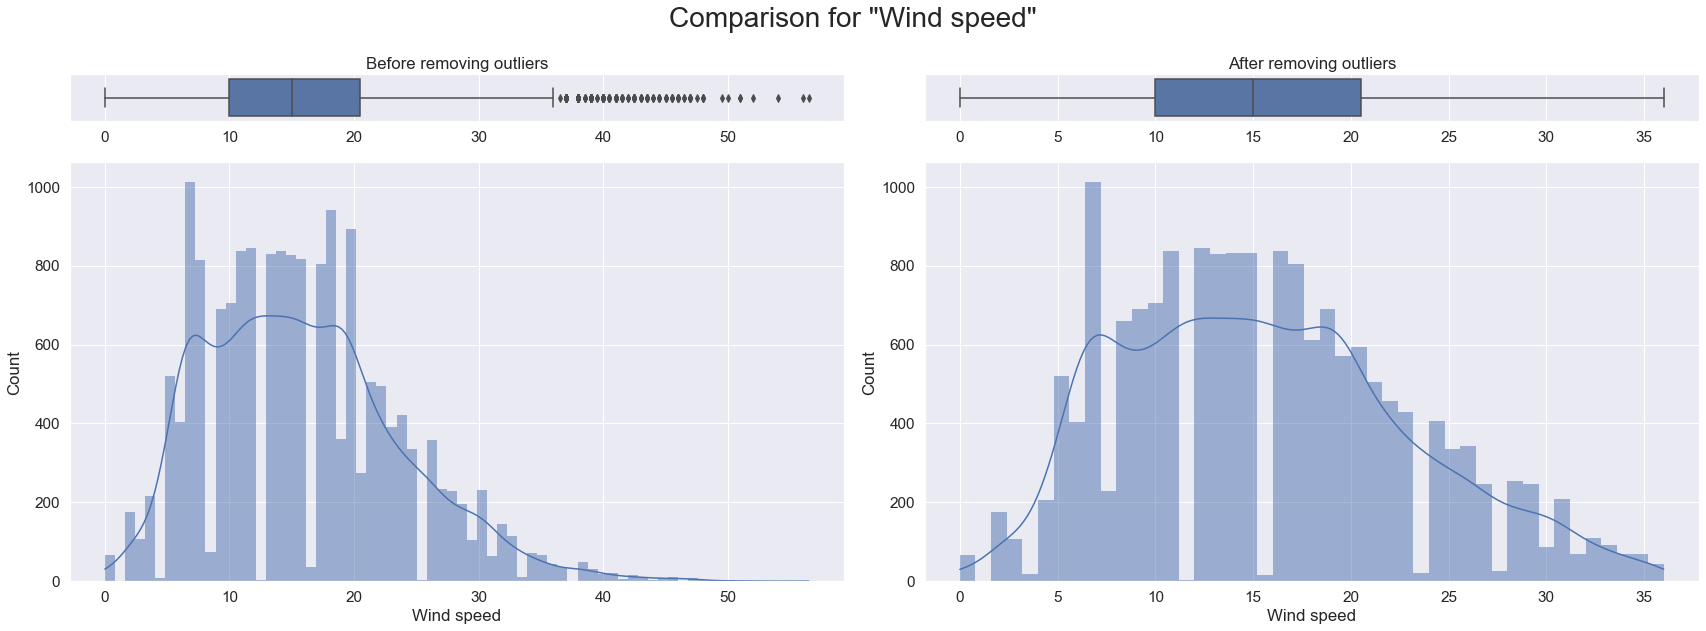

In [14]:
Cleaning_data_effectiveness('Wind speed')

### After remove outliers from numerical columns we get a little better data distributions than before. We use this method to filter our Dataframe and compare both **'Bikes share'** columns.

In [15]:
# Remove outliers from many columns in loop
for i in ['Temp 2', 'Humidity', 'Wind speed']:
    bikeshares = Outliers_filter(i)

---

In [16]:
## 'cols_name' was used before as list ['Weather code', 'Holiday', 'Weekend', 'Season']
bikeshares[cols_name] = bikeshares[cols_name].astype('int')

bikeshares.head(10)

,timestamp,Bikes share,Temp 1,Temp 2,Humidity,Wind speed,Weather code,Holiday,Weekend,Season,Hour,Weekday,Month,Year
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3,0,1,3,0,4,1,2015
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1,0,1,3,1,4,1,2015
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1,0,1,3,2,4,1,2015
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1,0,1,3,3,4,1,2015
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1,0,1,3,4,4,1,2015
5,2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,1,0,1,3,5,4,1,2015
6,2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,4,0,1,3,6,4,1,2015
7,2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4,0,1,3,7,4,1,2015
8,2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4,0,1,3,8,4,1,2015
9,2015-01-04 09:00:00,301,2.0,-0.5,100.0,9.0,3,0,1,3,9,4,1,2015


## Looking for ***Pearson's*** and ***Spearman's correlation***

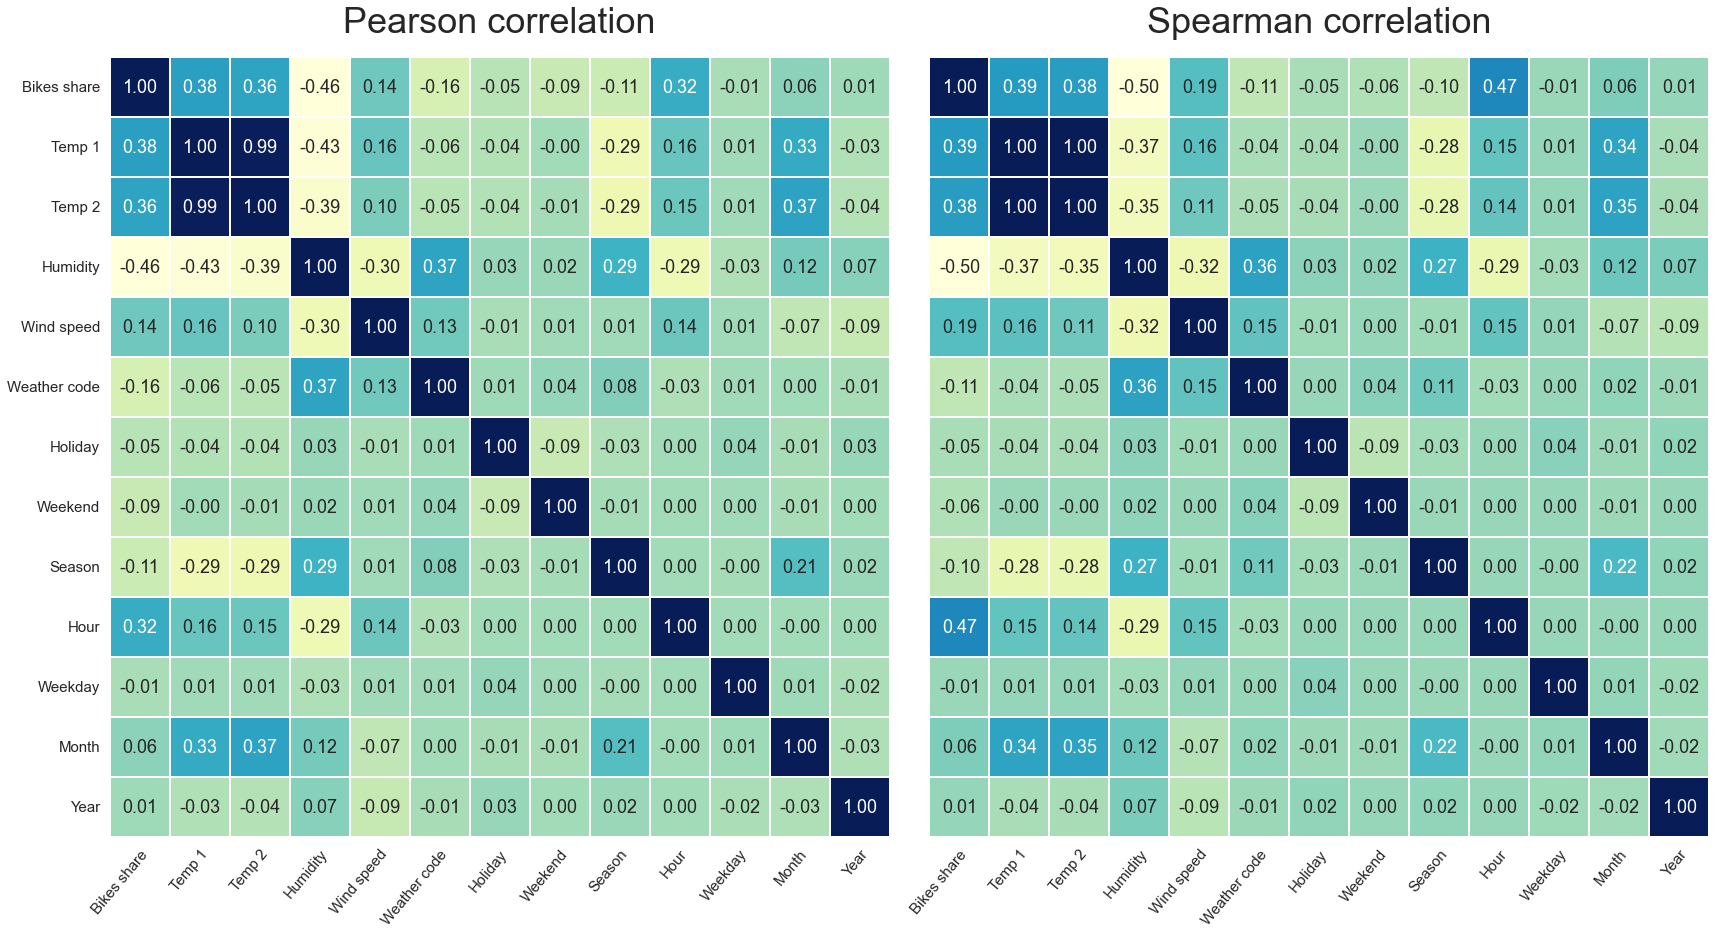

In [17]:
sns.set()

# Draw a heatmap with the numeric values in each cell
fig = plt.figure(figsize=(24, 20))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax_array = [ax1, ax2]
correlation_data = [bikeshares.corr(method='pearson'), bikeshares.corr(method='spearman')]
titles_array = ['Pearson correlation', 'Spearman correlation']

# We use axs parameter to tell seaborn which subplot to use for this plot
for axs, data, titles in zip(ax_array, correlation_data, titles_array):
    sns.heatmap(data = data, fmt='.2f', cbar=False, square=True, cmap="YlGnBu", annot=True, annot_kws={"fontsize":18}, linewidths=.05, ax=axs)
    axs.set_title(titles, fontsize=36, pad=25)
    axs.set_xticklabels(ax1.get_xticklabels(), fontsize=15, rotation=50, ha="right", rotation_mode="anchor")
    axs.set_yticklabels(ax1.get_yticklabels(), fontsize=15)
# Y axis description on the left side only
ax2.set_yticklabels([])

plt.tight_layout()
plt.show()

### **Conclusion:**
- the strongest correlations are between `'Bikes share'` and `'Temp 1'`, `'Temp 2'`, `'Humidity'`, `'Hour'` values,
- almost 100% correlation between `'Temp 1'` and `'Temp 2'` allows us to remove one of them (it will be done for `'Temp 2'` because it has less Gaussian distribution)
- `'timestamp'` column with full datetime is not useful anymore (time and data are in the separate columns).

### Removing useless data (read **'conclusion'** text above)

In [18]:
bikeshares = bikeshares.drop(['timestamp', 'Temp 2'], axis=1)

bikeshares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17035 entries, 0 to 17034
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Bikes share   17035 non-null  int64  
 1   Temp 1        17035 non-null  float64
 2   Humidity      17035 non-null  float64
 3   Wind speed    17035 non-null  float64
 4   Weather code  17035 non-null  int32  
 5   Holiday       17035 non-null  int32  
 6   Weekend       17035 non-null  int32  
 7   Season        17035 non-null  int32  
 8   Hour          17035 non-null  int64  
 9   Weekday       17035 non-null  int64  
 10  Month         17035 non-null  int64  
 11  Year          17035 non-null  int64  
dtypes: float64(3), int32(4), int64(5)
memory usage: 1.3 MB


### Reduce dataframe size by changing type of every data in the columns

In [19]:
cols1 = ['Temp 1', 'Humidity', 'Wind speed']
cols2 = ['Bikes share', 'Weather code', 'Holiday', 'Weekend', 'Season', 'Hour', 'Weekday', 'Month', 'Year']
bikeshares[cols1] = bikeshares[cols1].apply(pd.to_numeric, downcast="float")
bikeshares[cols2] = bikeshares[cols2].apply(pd.to_numeric, downcast="unsigned")

bikeshares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17035 entries, 0 to 17034
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Bikes share   17035 non-null  uint16 
 1   Temp 1        17035 non-null  float32
 2   Humidity      17035 non-null  float32
 3   Wind speed    17035 non-null  float32
 4   Weather code  17035 non-null  uint8  
 5   Holiday       17035 non-null  uint8  
 6   Weekend       17035 non-null  uint8  
 7   Season        17035 non-null  uint8  
 8   Hour          17035 non-null  uint8  
 9   Weekday       17035 non-null  uint8  
 10  Month         17035 non-null  uint8  
 11  Year          17035 non-null  uint16 
dtypes: float32(3), uint16(2), uint8(7)
memory usage: 382.7 KB


In [20]:
# 15 randomly chosen indexes from table to check effect of the last changes
bikeshares.sample(15)

,Bikes share,Temp 1,Humidity,Wind speed,Weather code,Holiday,Weekend,Season,Hour,Weekday,Month,Year
3583,1324,16.5,55.5,21.5,7,0,0,1,14,8,6,2015
8620,140,7.0,76.0,20.5,1,0,1,3,2,10,1,2016
7046,4109,9.5,97.0,7.0,4,0,0,2,8,2,11,2015
16295,151,4.5,84.0,13.0,1,0,1,3,3,4,12,2016
3070,3063,17.5,41.0,22.0,1,0,1,0,14,17,5,2015
12050,93,12.0,94.0,10.0,3,0,0,1,2,6,6,2016
4155,785,19.0,68.0,13.0,1,0,0,1,23,2,7,2015
160,922,6.5,61.0,30.0,1,0,1,3,10,11,1,2015
11163,1677,10.0,58.0,23.0,7,0,0,0,16,29,4,2016
6716,1185,14.0,74.5,10.0,3,0,0,2,13,19,10,2015


### If all the changes were made correctly, we save data into new CSV file

In [21]:
bikeshares = bikeshares.to_parquet('London_bikes_share.parquet.gzip', compression='gzip')
bikeshares = pd.read_parquet('London_bikes_share.parquet.gzip')

---

### Next we will visualize the effect of **`'Weekend'`** and **`'Holiday'`** on the **`'Bikes share'`** by hours.

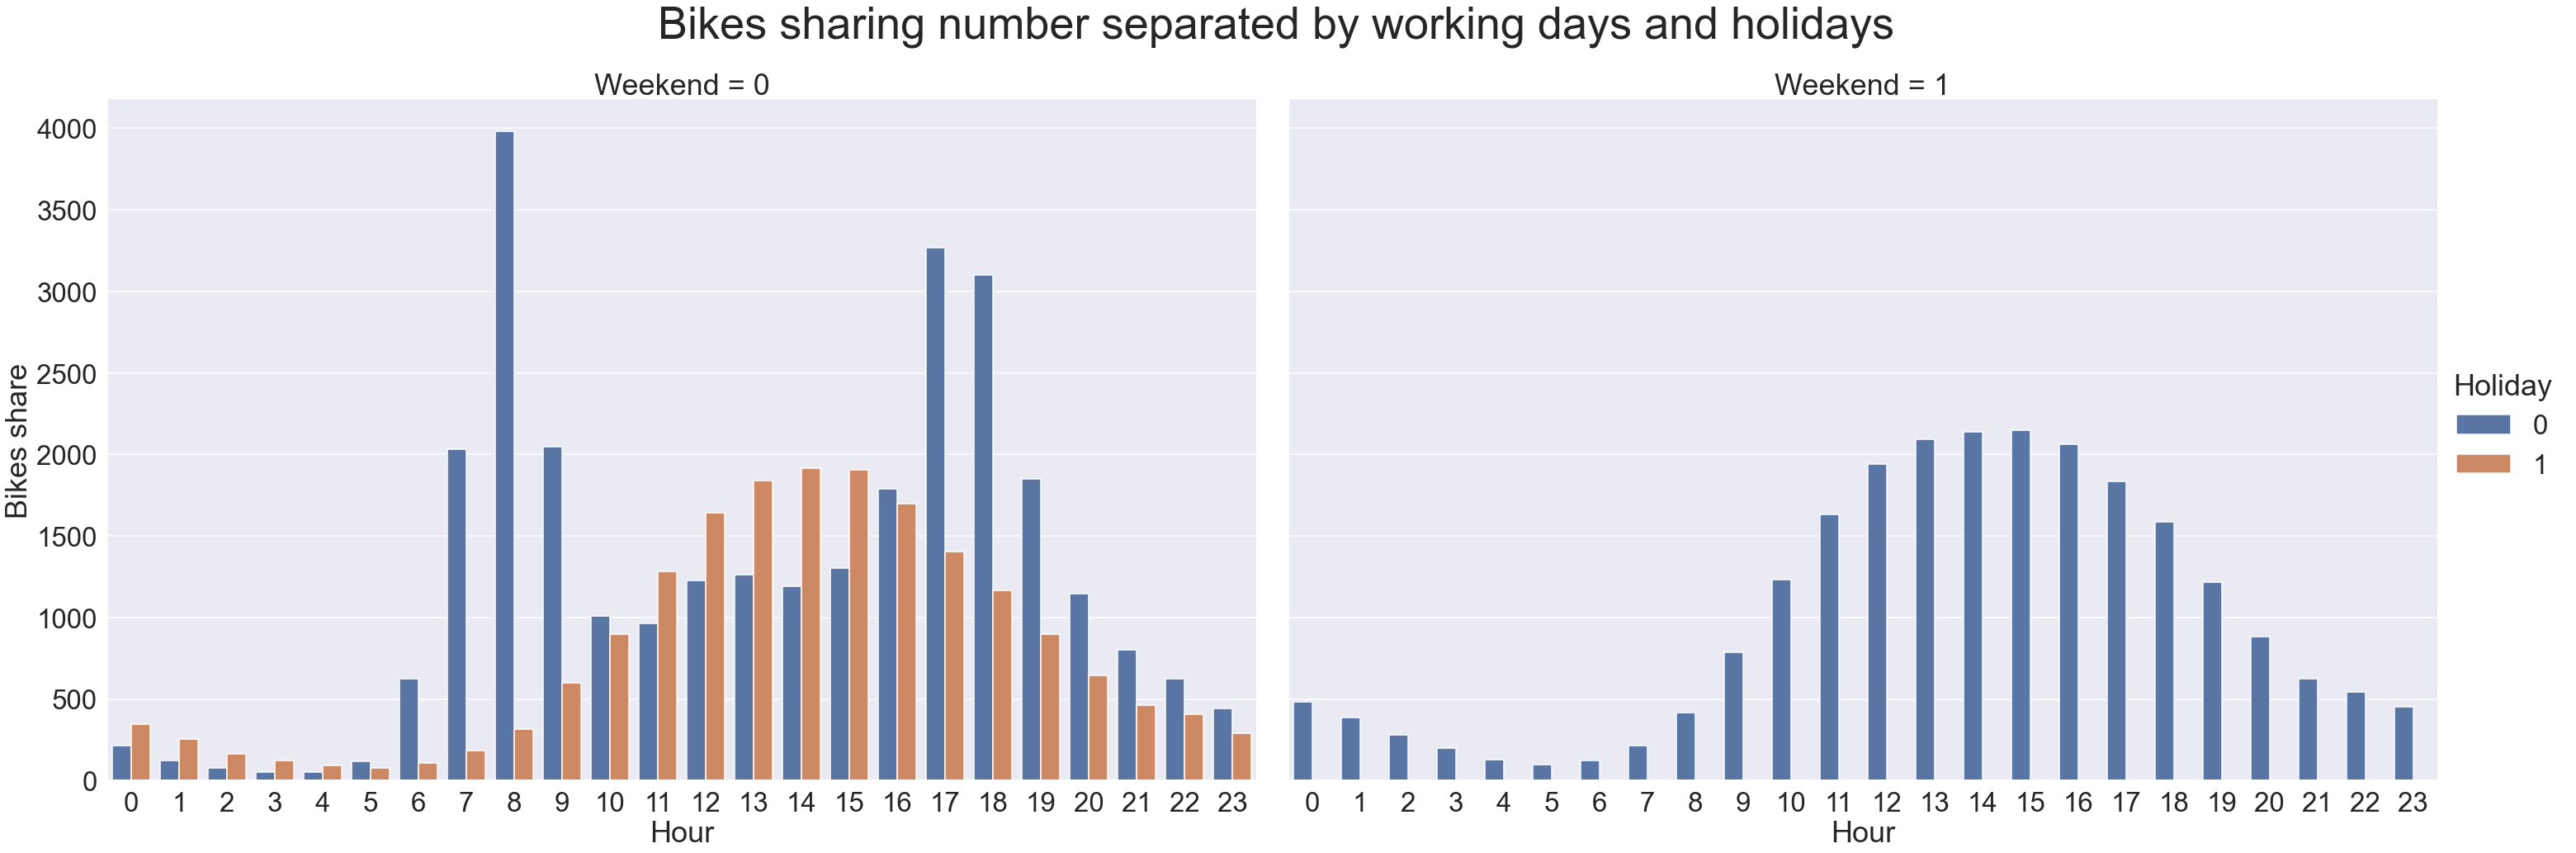

In [22]:
sns.set(context='talk', font_scale=2)
fig.set_size_inches(24, 14)

s = sns.catplot(data=bikeshares, x='Hour', y='Bikes share', kind='bar',
                ci=None, hue='Holiday', col='Weekend', 
                palette='deep', height=15, aspect=1.4)
s.fig.suptitle('Bikes sharing number separated by working days and holidays', size=54)
s.fig.subplots_adjust(top=.875)

plt.show()

#### As we can see, the both variables (weekend and holiday) have a similar effect for number of shared bikes. One thing to note is that a non-holiday day can still also be a weekend, which make some extra correlation between that parameters.

#### There are binormal distribution for working days (no weekend, no holiday) and normal distributions for weekend and holiday days.

***

## Using algorithms we are looking for dependencies between data in column `'Bikes share'` and the rest data.

In [23]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, HalvingGridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import tempfile
from shutil import rmtree
from joblib import memory, dump, load

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [24]:
# Convert data to 'category' type - preparation to performing OneHotEncoder process
category_columns = ['Weather code', 'Holiday', 'Weekend', 'Season', 'Hour', 'Weekday', 'Month', 'Year']
bikeshares[category_columns] = bikeshares[category_columns].astype('category')

categorical_features = bikeshares.select_dtypes(include='category').columns
categorical_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Columns to be scaled: 'Bikes share', 'Temp 1', 'Humidity', 'Wind speed'
numeric_features = bikeshares.drop(['Bikes share'], axis=1).select_dtypes(include='number').columns
numeric_transformer = Pipeline(steps = [('scaler', StandardScaler())])


preprocessor = ColumnTransformer(transformers = [('num', numeric_transformer, numeric_features),
                                                 ('cat', categorical_transformer, categorical_features)])

In [25]:
bikeshares.head()

,Bikes share,Temp 1,Humidity,Wind speed,Weather code,Holiday,Weekend,Season,Hour,Weekday,Month,Year
0,182,3.0,93.0,6.0,3,0,1,3,0,4,1,2015
1,138,3.0,93.0,5.0,1,0,1,3,1,4,1,2015
2,134,2.5,96.5,0.0,1,0,1,3,2,4,1,2015
3,72,2.0,100.0,0.0,1,0,1,3,3,4,1,2015
4,47,2.0,93.0,6.5,1,0,1,3,4,4,1,2015


In [26]:
bikeshares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17035 entries, 0 to 17034
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Bikes share   17035 non-null  uint16  
 1   Temp 1        17035 non-null  float32 
 2   Humidity      17035 non-null  float32 
 3   Wind speed    17035 non-null  float32 
 4   Weather code  17035 non-null  category
 5   Holiday       17035 non-null  category
 6   Weekend       17035 non-null  category
 7   Season        17035 non-null  category
 8   Hour          17035 non-null  category
 9   Weekday       17035 non-null  category
 10  Month         17035 non-null  category
 11  Year          17035 non-null  category
dtypes: category(8), float32(3), uint16(1)
memory usage: 369.3 KB


### If all the changes were made correctly, we save data into new CSV file

In [27]:
bikeshares = bikeshares.to_parquet('London_full_df.parquet.gzip', compression='gzip')
bikeshares = pd.read_parquet('London_full_df.parquet.gzip')

### Split data into dependent and independent (target) parts named `X`, `y` and using after that crossvalidation based on time series.

In [28]:
tscv = TimeSeriesSplit(gap=2)

for train_index, test_index in tscv.split(bikeshares):
    X = bikeshares.drop(['Bikes share'], axis=1)
    y = bikeshares['Bikes share']
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

## **Regressors importing**

In [29]:
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.svm import SVR, LinearSVR, NuSVR
from sklearn.neighbors import RadiusNeighborsRegressor

In [30]:
regr_default_dict = {'linear': LinearRegression(),
                     'sgd': SGDRegressor(),
                     'lasso': Lasso(),
                     'elastic': ElasticNet(),
                     'decisiontree': DecisionTreeRegressor(),
                     'randomforest': RandomForestRegressor(),
                     'extratrees': ExtraTreesRegressor(),
                     'adaboost': AdaBoostRegressor(),
                     'svr': SVR(),
                     'linear_svr': LinearSVR(),
                     'nu_svr': NuSVR(),
                     'radius_knn': RadiusNeighborsRegressor()}

In [31]:

def regr_results(regr):
    tempdir = tempfile.mkdtemp(dir='C:\\Users\\Lenovo\\Prace\\London_bike\\Temp')

    regr_pipe = Pipeline(steps = [('first', Pipeline([('preprocessor', preprocessor)], memory=tempdir)),
                                  ('regressor', regr)])
    
    scores = cross_val_score(regr_pipe, X_train, y_train, scoring='r2',
                             n_jobs=15, verbose=0, cv=tscv)
    
    R2, RMSE = scores.mean(), scores.std()
    ## Take only regressors with high enough R2 score value and calculate predicted target value
    ypred_list = []
    if R2 >= 0.8:
        regr_name = regr.__class__.__name__
        print(f'For "{regr_name}" R2={R2:.3f}, RMSE={RMSE:.4f}\n')
        ypred = regr_pipe.fit(X_train, y_train).predict(X_test)
        ypred_list.append(regr_name)
        ypred_list.append(ypred)
    
    # Clear the cache directory when you don't need it anymore
    rmtree(tempdir)

    return ypred_list


for i in list(regr_default_dict.values()):
    regr_results(i)

For "DecisionTreeRegressor" R2=0.809, RMSE=0.0687

For "RandomForestRegressor" R2=0.885, RMSE=0.0400

For "ExtraTreesRegressor" R2=0.891, RMSE=0.0408

For "RadiusNeighborsRegressor" R2=0.974, RMSE=0.0068



#### With default parameters for `'RadiusNeighborsRegressor'` we achieved R2 score > 97%. Let's check it on plot.

For "RadiusNeighborsRegressor" R2=0.974, RMSE=0.0068



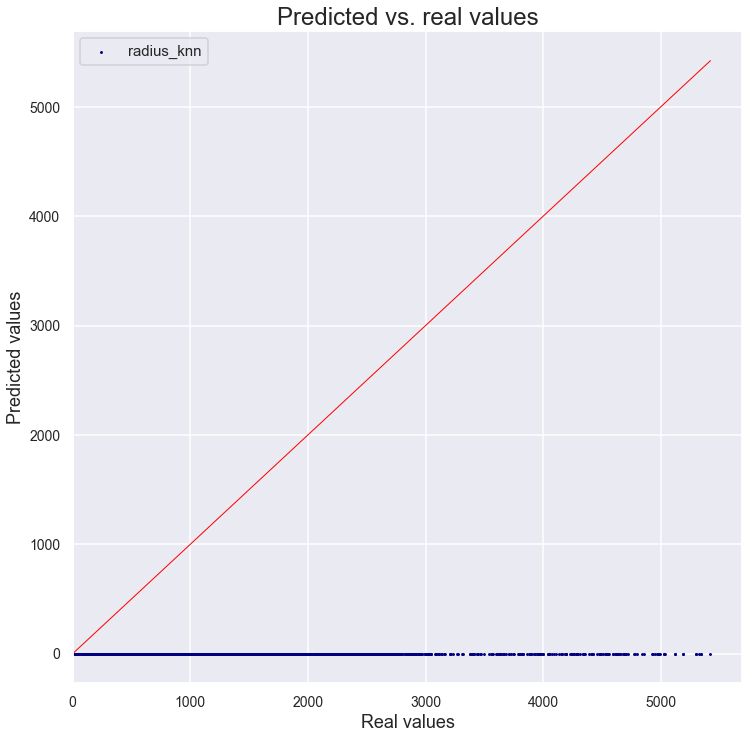

In [32]:
radius_knn_ypred_1 = regr_results(RadiusNeighborsRegressor())

fig, ax = plt.subplots(figsize=(12, 12))

plt.scatter(y_test, radius_knn_ypred_1[1], color='navy', s=2, label='radius_knn')
plt.plot(y_test.sort_values(), y_test.sort_values(), c='red', lw=1)
ax.set_xlabel('Real values', fontsize = 18)
ax.set_ylabel('Predicted values', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlim(left=0)
plt.legend(fontsize=15)
ax.set_title('Predicted vs. real values', fontsize = 24)

plt.show()

#### This regressor does not give us acceptable results even though its r2_score is 97% !! Next regressors with highest r2_score taking into account are algorithms based on tree searching.

For "ExtraTreesRegressor" R2=0.891, RMSE=0.0420

For "RandomForestRegressor" R2=0.886, RMSE=0.0394



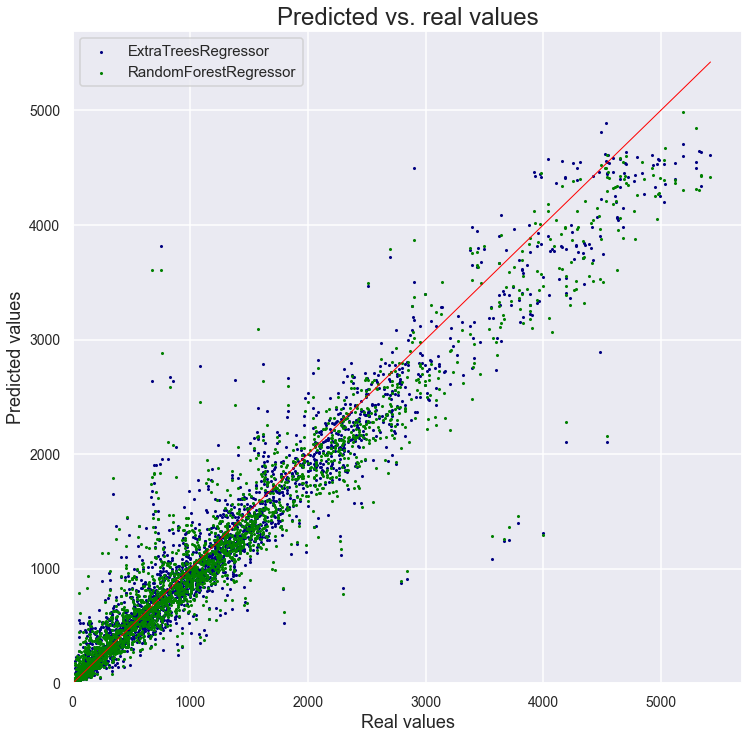

In [33]:
extratrees_ypred = regr_results(ExtraTreesRegressor())
randforest_ypred = regr_results(RandomForestRegressor())

fig, ax = plt.subplots(figsize=(12, 12))

plt.scatter(y_test, extratrees_ypred[1], color='navy', s=2.5, label=extratrees_ypred[0])
plt.scatter(y_test, randforest_ypred[1], color='green', s=2.5, label=randforest_ypred[0])
plt.plot(y_test.sort_values(), y_test.sort_values(), c='red', lw=1)
ax.set_xlabel('Real values', fontsize = 18)
ax.set_ylabel('Predicted values', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.legend(fontsize=15)
ax.set_title('Predicted vs. real values', fontsize = 24)

plt.show()

### For making much better predictions task we will use hyperparameters in the both tree-based regressors: `'ExtraTreesRegressor'` and `'RandomForestRegressor'`.

In [64]:
## Save regressor model using joblib 'dump' function
def save_model(regr_type, model):
    _ = regr_type.__class__.__name__
    return dump(model, f'Best_model_{_}.joblib', compress=5)


## Predicting target values using algorithm hyperparameters
def regressor_with_hyperparams(regr_type, params, *args):
    tempdir = tempfile.mkdtemp(dir='C:\\Users\\Lenovo\\Prace\\London_bike\\Temp')

    pipe = Pipeline(steps = [('first', Pipeline([('preprocessor', preprocessor)], memory=tempdir)),
                             ('regressor', regr_type)])
    
    model = HalvingGridSearchCV(pipe, params, scoring='r2',
                                refit=True, n_jobs=15, cv=tscv)
    model.fit(X_train, y_train)
    
    ## Print best result and get Dataframe with all hyperparameters results:
    print(f'Best params:{model.best_params_}\nBest R2 score:{100*(model.best_score_):.1f}%')

    df = pd.DataFrame(model.cv_results_)

    # Clear the cache directory when you don't need it anymore
    rmtree(tempdir)
    ## args is using as a 'trigger' depending on the desired result(s)
    if args:
        return df, model.fit(X_train, y_train).predict(X_test), save_model(regr_type, model)
    else:
        return df

### 1) ExtraTrees

In [35]:
extra_trees = ExtraTreesRegressor(n_jobs=15, random_state=42)

In [36]:
extratrees_params_1 = {'regressor__n_estimators': np.arange(100, 510, 10)}
df_extratrees_1 = regressor_with_hyperparams(extra_trees, extratrees_params_1)

Best params:{'regressor__n_estimators': 490}
Best R2 score:89.3%


In [37]:
extratrees_params_2 = {'regressor__min_samples_leaf': [2, 3],
                       'regressor__n_estimators': np.arange(300, 510, 10)}
df_extratrees_2 = regressor_with_hyperparams(extra_trees, extratrees_params_2)

Best params:{'regressor__min_samples_leaf': 2, 'regressor__n_estimators': 400}
Best R2 score:89.3%


In [38]:
extratrees_params_3 = {'regressor__min_samples_split': [3, 4],
                       'regressor__min_samples_leaf': [1, 2, 3],
                       'regressor__n_estimators': np.arange(300, 510, 10)}
df_extratrees_3 = regressor_with_hyperparams(extra_trees, extratrees_params_3)

Best params:{'regressor__min_samples_leaf': 3, 'regressor__min_samples_split': 3, 'regressor__n_estimators': 430}
Best R2 score:88.9%


In [39]:
extratrees_params_4 = {'regressor__max_features': ["auto", "sqrt", "log2"],
                       'regressor__n_estimators': np.arange(300, 510, 10)}

df_extratrees_4 = regressor_with_hyperparams(extra_trees, extratrees_params_4)

Best params:{'regressor__max_features': 'auto', 'regressor__n_estimators': 380}
Best R2 score:89.1%


In [40]:
extratrees_params_5 = {'regressor__n_estimators': np.arange(300, 510, 10),
                       'regressor__ccp_alpha': np.linspace(0, 1, 11)}

df_extratrees_5 = regressor_with_hyperparams(extra_trees, extratrees_params_5)

Best params:{'regressor__ccp_alpha': 0.2, 'regressor__n_estimators': 320}
Best R2 score:89.1%


### 2) RandomForest

In [41]:
rf = RandomForestRegressor(n_jobs=15, random_state=42)

In [42]:
randomforest_params_1 = {'regressor__n_estimators': np.arange(100, 510, 10)}

df_randomforest_1 = regressor_with_hyperparams(rf, randomforest_params_1)

Best params:{'regressor__n_estimators': 150}
Best R2 score:88.5%


In [43]:
randomforest_params_2 = {'regressor__min_samples_split': [2, 3, 4],
                         'regressor__n_estimators': np.arange(250, 510, 10)}

df_randomforest_2 = regressor_with_hyperparams(rf, randomforest_params_2)

Best params:{'regressor__min_samples_split': 2, 'regressor__n_estimators': 450}
Best R2 score:88.6%


In [44]:
randomforest_params_3 = {'regressor__ccp_alpha': np.linspace(0, 1, 11),
                         'regressor__n_estimators': np.arange(250, 510, 10)}

df_randomforest_3 = regressor_with_hyperparams(rf, randomforest_params_3)

Best params:{'regressor__ccp_alpha': 0.0, 'regressor__n_estimators': 460}
Best R2 score:88.5%


In [45]:
randomforest_params_4 = {'regressor__n_estimators': np.arange(100, 505, 5)}

df_randomforest_4 = regressor_with_hyperparams(rf, randomforest_params_4)

Best params:{'regressor__n_estimators': 430}
Best R2 score:88.5%


### Graphical comparison of the real and calculating values

In [65]:
def Regressor_results(regressor):
    return regressor_with_hyperparams(rf, regressor, True)

randomforest_results = Regressor_results(randomforest_params_2)
extratrees_results = Regressor_results(extratrees_params_1)

Best params:{'regressor__min_samples_split': 2, 'regressor__n_estimators': 440}
Best R2 score:88.5%
Best params:{'regressor__n_estimators': 410}
Best R2 score:88.7%


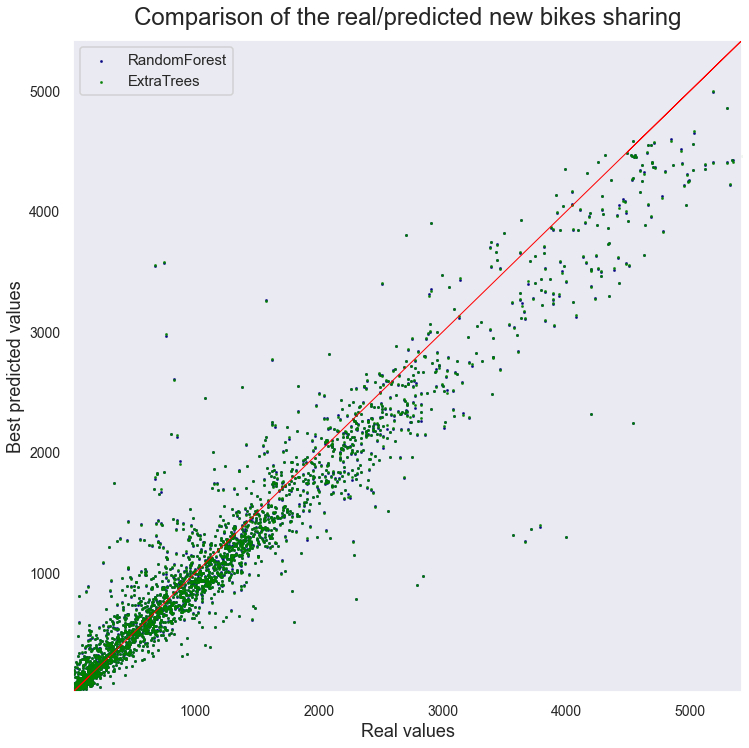

In [66]:
def Plot_axes_ranges(regr1, regr2):
    ypred1, ypred2 = pd.Series(regr1), pd.Series(regr2)
    # Calculating limes for the x,y axes on the plot with 2 regressors
    y_vals = pd.concat([y_test, ypred1, ypred2], axis=0)
    return (y_vals.min(), y_vals.max())


## Numbers of index from 0 to 2 mean:
    ## 0 - all Dataframe results after making regression process
    ## 1 - predicted y (target) values
    ## 2 - saved model using by regressor
ypred_rf = randomforest_results[1]
ypred_extratrees = extratrees_results[1]



fig, ax = plt.subplots(figsize=(12, 12))

plt.scatter(y_test, ypred_rf, c='navy', s=2, alpha=0.8, label='RandomForest')
plt.scatter(y_test, ypred_extratrees, c='green', s=2, alpha=0.8, label='ExtraTrees')
## Ideal situation - all points are on the red line with 45 angle degree
plt.plot(y_test, y_test, linestyle='-', c='red', lw=1)
plt.xlim(Plot_axes_ranges(ypred_rf, ypred_extratrees))
plt.ylim(Plot_axes_ranges(ypred_rf, ypred_extratrees))
plt.xlabel('Real values', fontsize = 18)
plt.ylabel('Best predicted values', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Comparison of the real/predicted new bikes sharing', fontsize = 24, pad=15)
plt.grid(visible=None)
plt.legend(fontsize = 15)

plt.show()

### Final conclusion about results of regression:
### Either with and without tuning hyperparameters for both tree-based algorithms I was achieved almost the same quality of prediction (graphically and numerically as a r2_score); differences were less than 1%, so also `ExtraTreesRegressor` and `RandomForestRegressor` models will be saved and used for future comparison recently seen data with much more data taking from webscrapping.

### Saving regressor models to use them later

In [67]:
# RandomForest model
randomforest_results[2]

# ExtraTrees model
extratrees_results[2]

['Best_model_RandomForestRegressor.joblib']

---